In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

In [4]:
df = pd.read_csv("./data/data_to_be_cleaned.csv")

# Convert our date column
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df

,date,sales
0,2024-01-01,0.00
1,2024-01-02,0.01
2,2024-01-03,0.07
3,2024-01-04,0.77
4,2024-01-05,1.48
5,2024-01-06,2.08
6,2024-01-07,1.53
7,2024-01-08,3.48
8,2024-01-09,4.17
9,2024-01-10,5.96


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    50 non-null     datetime64[ns]
 1   sales   41 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 932.0 bytes


In [11]:
# Specific dates we are missing data
na_dates = df[df["sales"].isna()]["date"].values

na_dates

array(['2024-01-16T00:00:00.000000000', '2024-01-25T00:00:00.000000000',
       '2024-01-29T00:00:00.000000000', '2024-02-05T00:00:00.000000000',
       '2024-02-06T00:00:00.000000000', '2024-02-07T00:00:00.000000000',
       '2024-02-08T00:00:00.000000000', '2024-02-09T00:00:00.000000000',
       '2024-02-10T00:00:00.000000000'], dtype='datetime64[ns]')

In [16]:
# How do we go about filling these missing values?

# Options.
# 1. Looking at the data around our missing values, and use that to fill in our data (interpolation) - (linear interpolation)


df["linear_interp"] = df["sales"].interpolate(method="linear")

df

,date,sales,linear_interp
0,2024-01-01,0.00,0.00
1,2024-01-02,0.01,0.01
2,2024-01-03,0.07,0.07
3,2024-01-04,0.77,0.77
4,2024-01-05,1.48,1.48
5,2024-01-06,2.08,2.08
6,2024-01-07,1.53,1.53
7,2024-01-08,3.48,3.48
8,2024-01-09,4.17,4.17
9,2024-01-10,5.96,5.96


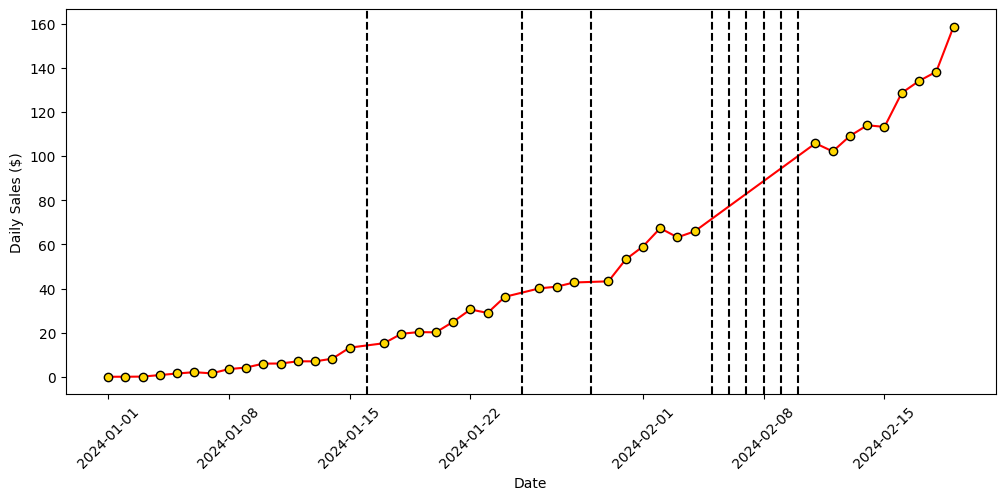

In [20]:


# We can plot this to see how the missing data affects us and to see where we are missing data

plt.figure(figsize = (12,5))

plt.plot(df["date"], df["linear_interp"], "-", label="linear", color="red")
plt.plot(df["date"], df["sales"], "o", label='sales', color="gold", markeredgewidth=1, markeredgecolor='black')

for date_value in na_dates:
    plt.axvline(date_value, linestyle="dashed", color="black")

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Daily Sales ($)")

plt.show()

In [13]:
# How do we go about filling these missing values?

# Options.
# 1. Looking at the data around our missing values, and use that to fill in our data (interpolation) - (linear interpolation)

